In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def load_data(filename):
  # read the data separate by space
  data = pd.read_csv(filename, sep='\s+', header = None)
  return data

In [ ]:
def mergedata():
  animals = load_data('animals')
  countries = load_data('countries')
  fruits = load_data('fruits')
  veggies = load_data('veggies')
  animals['class'] = '0'
  countries['class'] = '1'
  fruits['class'] = '2'
  veggies['class'] = '3'
  # merge four dataset into one
  frames = [animals, countries, fruits, veggies]
  dataset = pd.concat(frames)
  # transform dataframe to matrix
  dataset = np.array(dataset)
  return dataset

In [ ]:
def l2_normalisation(dataset):
  # for every object in dataset, l2 normalise the object and store it 
  for i in range(len(dataset)):
    dataset[i, 1:-1] = dataset[i,1:-1]/np.linalg.norm(dataset[i,1:-1])
  return dataset

In [ ]:
def distance(X,Y):
    #Return the Euclidean distance between X and Y
    return np.linalg.norm(X-Y)

In [ ]:
def manDistance(X,Y):
  # return the manhattan distance between X and Y
  return np.linalg.norm(X-Y, ord = 1)

In [ ]:
def assign(centroids, dataset, clusters,k):
    numOfObjects = len(dataset)
    #for every object in the dataset
    for i in range(numOfObjects):
        X = dataset[i, 1:-1]
        #find the closest centroid
        centroidsOfX = -1;
        distanceToClosestcentroids = np.Inf;
        for y in range(k):
            currentcentroids = centroids[y,:]
            dist = distance(X, currentcentroids)
            if dist < distanceToClosestcentroids:
                #Found closer centroid
                distanceToClosestcentroids = dist
                centroidsOfX = y
        #assign to X its closest centroid
        clusters[i] = int(centroidsOfX)

In [ ]:
def objectiveFunc(centroids, dataset,k):
    numOfObjects = len(dataset)
    clusters = np.zeros((len(dataset),1))
    #assign objects to closest centroid
    assign(centroids, dataset, clusters,k)
    obj = 0
    for i in range(numOfObjects):
        obj = obj + distance(dataset[i, 1:-1], centroids[int(clusters[i,:])])
    return obj,clusters

In [ ]:
def objectiveFunc_M(centroids, dataset,k):
    numOfObjects = len(dataset)
    clusters = np.zeros((len(dataset),1))
    #assign objects to closest centroid
    assign(centroids, dataset, clusters,k)
    obj = 0
    for i in range(numOfObjects):
      # calculate the L1 distance between object and its centroid
        obj = obj + manDistance(dataset[i, 1:-1], centroids[int(clusters[i,:])])
    return obj,clusters

In [ ]:
def kMeans(k, dataset, clusters, maxIter=10):
    numOfObjects = len(dataset)
    np.random.seed(45)
    centroidsInd = np.random.choice(numOfObjects, k, replace=False)
    # store centroids vectors in centroids
    centroids = np.empty((0,300))
    for i in range(len(centroidsInd)):
      centroids = np.vstack((centroids, dataset[centroidsInd[i],1:-1]))
    assign(centroids, dataset, clusters, k)
    #print(clusters)
    tempClusters = np.copy(clusters)
    tempCentroids = np.copy(centroids)
    bestObjective, tempClusters = objectiveFunc(centroids, dataset,k)
    print('-----------------------------------------------------------------------------------------------------')
    print('Initial objective function using',k,'clusters: %.2f' % bestObjective, ';Initial centroids indices: ', centroidsInd)
    isObjectiveImproved = False
    counter = 0

    for i in range(maxIter):
      isObjectiveImproved = False
      # update the temp_centroids using mean
      temp_centroids = np.empty((0,300), int)
      for index in range(k):
        clusterDataset = np.empty((0,302), int)
        for x in range(numOfObjects):
          if int(tempClusters[x]) == index:
            clusterDataset = np.vstack((clusterDataset, dataset[x]))
            # calculate the mean vector of a cluster
        new_centroid = np.mean(clusterDataset[:,1:-1], axis = 0)
        temp_centroids = np.vstack((temp_centroids, new_centroid))

      tempObjective, tempClusters= objectiveFunc(temp_centroids, dataset, k)
      if tempObjective < bestObjective:
        isObjectiveImproved = True
      if isObjectiveImproved:
            centroids = temp_centroids
            bestObjective = tempObjective
            counter += 1
      else:
        break
    print('improved objective function value after ',counter,'times of iteration: %.2f' % bestObjective)
    return tempClusters

In [ ]:
def kMedians(k, dataset, clusters, maxIter=10):
    numOfObjects = len(dataset)
    np.random.seed(45)
    centroidsInd = np.random.choice(numOfObjects, k, replace=False)
    # store centroids in centroids
    centroids = np.empty((0,300))
    for i in range(len(centroidsInd)):
      centroids = np.vstack((centroids, dataset[centroidsInd[i],1:-1]))
    assign(centroids, dataset, clusters, k)
    #print(clusters)
    tempClusters = np.copy(clusters)
    tempCentroids = np.copy(centroids)
    bestObjective, tempClusters = objectiveFunc_M(centroids, dataset,k)
    print('-----------------------------------------------------------------------------------------------------')
    print('Initial objective function using',k,'clusters: %.2f' % bestObjective, ';    Initial centroids indices: ', centroidsInd)
    isObjectiveImproved = False
    counter = 0

    for i in range(maxIter):
      isObjectiveImproved = False
      # update the temp_centroids using median
      temp_centroids = np.empty((0,300), int)
      for index in range(k):
        clusterDataset = np.empty((0,302), int)
        for x in range(numOfObjects):
          if int(tempClusters[x]) == index:
            clusterDataset = np.vstack((clusterDataset, dataset[x]))
            # find the median vector of a cluster
        new_centroid = np.median(clusterDataset[:,1:-1], axis = 0)
        temp_centroids = np.vstack((temp_centroids, new_centroid))

      tempObjective, tempClusters= objectiveFunc_M(temp_centroids, dataset, k)
      if tempObjective < bestObjective:
        isObjectiveImproved = True
      if isObjectiveImproved:
            centroids = temp_centroids
            bestObjective = tempObjective
            counter += 1
      else:
        break
    print('improved objective function value after ',counter,'times of iteration: %.2f' % bestObjective)
    return tempClusters

In [ ]:
def B_CUBED(clusters, dataset, k):
  precision = 0
  recall = 0
  precision_sum = 0
  recall_sum = 0
  f_score = 0
  numOfObjects = len(dataset)
  cluster_assign = np.empty((0, 4))
  for x in range(k):
      animalclass = 0
      countryclass = 0
      fruitclass = 0
      veggieclass = 0
      cluster_set = np.empty((k, 4))
      for i in range(numOfObjects):
        if clusters[i] == x:
          if dataset[i, -1] == '0':
            animalclass += 1
          elif dataset[i, -1] == '1':
            countryclass += 1
          elif dataset[i, -1] == '2':
            fruitclass += 1
          elif dataset[i, -1] == '3':
            veggieclass += 1
      cluster_set = [animalclass, countryclass, fruitclass, veggieclass]
      cluster_assign = np.vstack((cluster_assign, cluster_set))
  for i in range(numOfObjects):
    precision = cluster_assign[int(clusters[i]),int(dataset[i,-1])] / np.sum(cluster_assign[int(clusters[i]),:])
    precision_sum += precision
    recall = cluster_assign[int(clusters[i]),int(dataset[i,-1])] / np.sum(cluster_assign[:, int(dataset[i,-1])])
    recall_sum += recall
    f_score += (2*recall*precision)/(recall+precision)
  #print(precision_sum/len(dataset))
  #print(recall_sum/len(dataset))
  #print(f_score/len(dataset))
  return precision_sum/len(dataset), recall_sum/len(dataset),f_score/len(dataset)

In [ ]:
def plot_BCUBED(precision, recall, f_score, title):
  figure = plt.figure(1, figsize = (12, 4))
  plt.title(title, fontsize=14)
  x = [1,2,3,4,5,6,7,8,9]
  plt.plot(x,precision,'o-',color = 'c',label='precision', alpha=0.6)
  plt.plot(x,recall,'o-',color = 'r',label='recall', alpha=0.6)
  plt.plot(x,f_score,'o-',color = 'g',label='F-score', alpha=0.6)
  plt.xlabel('number of clusters(k)')
  plt.legend(loc = 'best')
  plt.show()

In [ ]:
def kMeans_withoutl2():
  title = 'K-Means algorithm without l2 B-CUBED evaluation'
  dataset = mergedata()
  clusters = np.zeros((len(dataset),1))
  precision = []
  recall = []
  f_score = []
  print('K-Means algorithm B-CUBED evaluation')
  for i in range(1,10):
    clusters = kMeans(i, dataset, clusters)
    p, r ,f = B_CUBED(clusters, dataset, i)
    precision.append(p)
    recall.append(r)
    f_score.append(f)
  plot_BCUBED(precision, recall, f_score, title)
kMeans_withoutl2()

In [ ]:
def kMeans_withl2():
  title = 'K-Means algorithm with l2 B-CUBED Evaluation'
  dataset = mergedata()
  dataset = l2_normalisation(dataset)
  clusters = np.zeros((len(dataset),1))
  precision = []
  recall = []
  f_score = []
  print('K-Means algorithm with l2 normalisation B-CUBED evaluation')
  for i in range(1,10):
    clusters = kMeans(i, dataset, clusters)
    p, r ,f = B_CUBED(clusters, dataset, i)
    precision.append(p)
    recall.append(r)
    f_score.append(f)
  plot_BCUBED(precision, recall, f_score, title)

In [ ]:
def kMedians_withoutl2():
  title = 'K-Medians algorithm without l2 B-CUBED evaluation'
  dataset = mergedata()
  clusters = np.zeros((len(dataset),1))
  precision = []
  recall = []
  f_score = []
  print('K-Medians algorithm B-CUBED evaluation')
  for i in range(1,10):
    clusters = kMedians(i, dataset, clusters)
    p, r ,f = B_CUBED(clusters, dataset, i)
    precision.append(p)
    recall.append(r)
    f_score.append(f)
  plot_BCUBED(precision, recall, f_score, title)

In [ ]:
def kMedians_withl2():
  title = 'K-Means algorithm with l2 B-CUBED Evaluation'
  dataset = mergedata()
  dataset = l2_normalisation(dataset)
  clusters = np.zeros((len(dataset),1))
  precision = []
  recall = []
  f_score = []
  print('K-Medians algorithm with l2 normalisation B-CUBED evaluation')
  for i in range(1,10):
    clusters = kMedians(i, dataset, clusters)
    p, r ,f = B_CUBED(clusters, dataset, i)
    precision.append(p)
    recall.append(r)
    f_score.append(f)
  plot_BCUBED(precision, recall, f_score, title)

In [ ]:
def main():
  kMeans_withoutl2()
  kMeans_withl2()
  kMedians_withoutl2()
  kMedians_withl2()
main()

K-Means algorithm B-CUBED evaluation
-----------------------------------------------------------------------------------------------------
Initial objective function using 1 clusters: 2818.25 ;Initial centroids indices:  [161]
improved objective function value after  1 times of iteration: 2028.74
-----------------------------------------------------------------------------------------------------
Initial objective function using 2 clusters: 2570.17 ;Initial centroids indices:  [161 256]
improved objective function value after  2 times of iteration: 1857.75
-----------------------------------------------------------------------------------------------------
Initial objective function using 3 clusters: 2530.48 ;Initial centroids indices:  [161 256 101]
improved objective function value after  6 times of iteration: 1798.38
-----------------------------------------------------------------------------------------------------
Initial objective function using 4 clusters: 2484.16 ;Initial cent

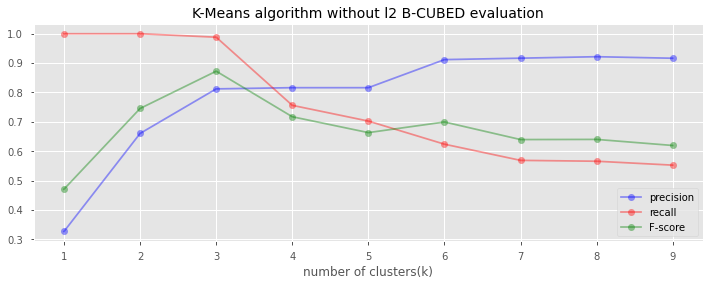

K-Means algorithm with l2 normalisation B-CUBED evaluation
-----------------------------------------------------------------------------------------------------
Initial objective function using 1 clusters: 407.42 ;Initial centroids indices:  [161]
improved objective function value after  1 times of iteration: 298.36
-----------------------------------------------------------------------------------------------------
Initial objective function using 2 clusters: 379.12 ;Initial centroids indices:  [161 256]
improved objective function value after  3 times of iteration: 273.24
-----------------------------------------------------------------------------------------------------
Initial objective function using 3 clusters: 371.57 ;Initial centroids indices:  [161 256 101]
improved objective function value after  8 times of iteration: 264.38
-----------------------------------------------------------------------------------------------------
Initial objective function using 4 clusters: 361.9

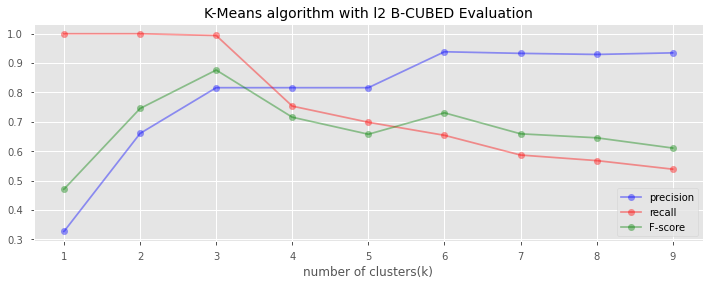

K-Medians algorithm B-CUBED evaluation
-----------------------------------------------------------------------------------------------------
Initial objective function using 1 clusters: 38796.62 ;    Initial centroids indices:  [161]
improved objective function value after  1 times of iteration: 27766.01
-----------------------------------------------------------------------------------------------------
Initial objective function using 2 clusters: 35453.76 ;    Initial centroids indices:  [161 256]
improved objective function value after  2 times of iteration: 25445.07
-----------------------------------------------------------------------------------------------------
Initial objective function using 3 clusters: 34882.02 ;    Initial centroids indices:  [161 256 101]
improved objective function value after  6 times of iteration: 24638.28
-----------------------------------------------------------------------------------------------------
Initial objective function using 4 clusters: 3

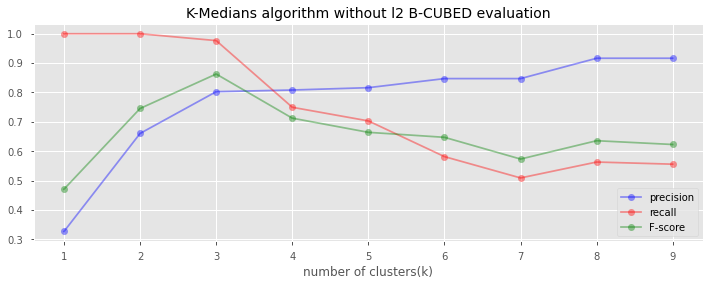

K-Medians algorithm with l2 normalisation B-CUBED evaluation
-----------------------------------------------------------------------------------------------------
Initial objective function using 1 clusters: 5610.08 ;    Initial centroids indices:  [161]
improved objective function value after  1 times of iteration: 4088.23
-----------------------------------------------------------------------------------------------------
Initial objective function using 2 clusters: 5236.12 ;    Initial centroids indices:  [161 256]
improved objective function value after  4 times of iteration: 3746.43
-----------------------------------------------------------------------------------------------------
Initial objective function using 3 clusters: 5123.98 ;    Initial centroids indices:  [161 256 101]
improved objective function value after  5 times of iteration: 3626.79
-----------------------------------------------------------------------------------------------------
Initial objective function usi

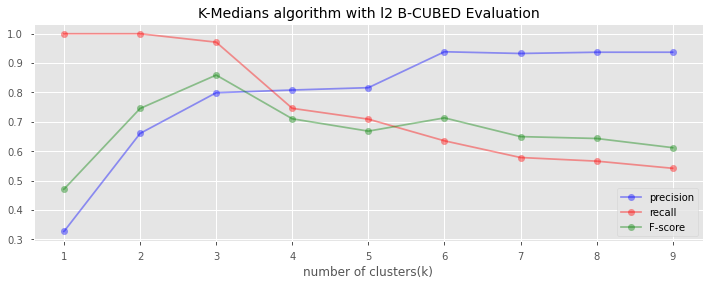

In [ ]:
# -*- coding: utf-8 -*-
"""K-Means.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1IhY3sR7QZo3pnMDKzBYatQrk5JsGD7So
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def load_data(filename):
    # read the data separate by space
    data = pd.read_csv(filename, sep='\s+', header=None)
    return data


def mergedata():
    animals = load_data('animals')
    countries = load_data('countries')
    fruits = load_data('fruits')
    veggies = load_data('veggies')
    animals['class'] = '0'
    countries['class'] = '1'
    fruits['class'] = '2'
    veggies['class'] = '3'
    # merge four dataset into one
    frames = [animals, countries, fruits, veggies]
    dataset = pd.concat(frames)
    # transform dataframe to matrix
    dataset = np.array(dataset)
    return dataset


def l2_normalisation(dataset):
    # for every object in dataset, l2 normalise the object and store it
    for i in range(len(dataset)):
        dataset[i, 1:-1] = dataset[i, 1:-1] / np.linalg.norm(dataset[i, 1:-1])
    return dataset


def distance(X, Y):
    # Return the Euclidean distance between X and Y
    return np.linalg.norm(X - Y)


def manDistance(X, Y):
    # return the L1 distance between X and Y
    return np.linalg.norm(X - Y, ord=1)


def assign(centroids, dataset, clusters, k):
    numOfObjects = len(dataset)
    # for every object in the dataset
    for i in range(numOfObjects):
        X = dataset[i, 1:-1]
        # find the closest centroid
        centroidsOfX = -1;
        distanceToClosestcentroids = np.Inf;
        for y in range(k):
            currentcentroids = centroids[y, :]
            dist = distance(X, currentcentroids)
            if dist < distanceToClosestcentroids:
                # Found closer centroid
                distanceToClosestcentroids = dist
                centroidsOfX = y
        # assign to X its closest centroid
        clusters[i] = int(centroidsOfX)


def objectiveFunc(centroids, dataset, k):
    numOfObjects = len(dataset)
    clusters = np.zeros((len(dataset), 1))
    # assign objects to closest centroid
    assign(centroids, dataset, clusters, k)
    obj = 0
    for i in range(numOfObjects):
        obj = obj + distance(dataset[i, 1:-1], centroids[int(clusters[i, :])])
    return obj, clusters


def objectiveFunc_M(centroids, dataset, k):
    numOfObjects = len(dataset)
    clusters = np.zeros((len(dataset), 1))
    # assign objects to closest centroid
    assign(centroids, dataset, clusters, k)
    obj = 0
    for i in range(numOfObjects):
        # calculate the L1 distance between object and its centroid
        obj = obj + manDistance(dataset[i, 1:-1], centroids[int(clusters[i, :])])
    return obj, clusters


def kMeans(k, dataset, clusters, maxIter=10):
    numOfObjects = len(dataset)
    np.random.seed(45)
    centroidsInd = np.random.choice(numOfObjects, k, replace=False)
    # store centroids vectors in centroids
    centroids = np.empty((0, 300))
    for i in range(len(centroidsInd)):
        centroids = np.vstack((centroids, dataset[centroidsInd[i], 1:-1]))
    assign(centroids, dataset, clusters, k)
    # print(clusters)
    tempClusters = np.copy(clusters)
    tempCentroids = np.copy(centroids)
    bestObjective, tempClusters = objectiveFunc(centroids, dataset, k)
    print('-----------------------------------------------------------------------------------------------------')
    print('Initial objective function using', k, 'clusters: %.2f' % bestObjective, ';Initial centroids indices: ',
          centroidsInd)
    isObjectiveImproved = False
    counter = 0

    for i in range(maxIter):
        isObjectiveImproved = False
        # update the temp_centroids using mean
        temp_centroids = np.empty((0, 300), int)
        for index in range(k):
            clusterDataset = np.empty((0, 302), int)
            for x in range(numOfObjects):
                if int(tempClusters[x]) == index:
                    clusterDataset = np.vstack((clusterDataset, dataset[x]))
                    # calculate the mean vector of a cluster
            new_centroid = np.mean(clusterDataset[:, 1:-1], axis=0)
            temp_centroids = np.vstack((temp_centroids, new_centroid))

        tempObjective, tempClusters = objectiveFunc(temp_centroids, dataset, k)
        if tempObjective < bestObjective:
            isObjectiveImproved = True
        if isObjectiveImproved:
            centroids = temp_centroids
            bestObjective = tempObjective
            counter += 1
        else:
            break
    print('improved objective function value after ', counter, 'times of iteration: %.2f' % bestObjective)
    return tempClusters


def kMedians(k, dataset, clusters, maxIter=100):
    numOfObjects = len(dataset)
    np.random.seed(45)
    centroidsInd = np.random.choice(numOfObjects, k, replace=False)
    # store centroids in centroids
    centroids = np.empty((0, 300))
    for i in range(len(centroidsInd)):
        centroids = np.vstack((centroids, dataset[centroidsInd[i], 1:-1]))
    assign(centroids, dataset, clusters, k)
    # print(clusters)
    tempClusters = np.copy(clusters)
    tempCentroids = np.copy(centroids)
    bestObjective, tempClusters = objectiveFunc_M(centroids, dataset, k)
    print('-----------------------------------------------------------------------------------------------------')
    print('Initial objective function using', k, 'clusters: %.2f' % bestObjective, ';    Initial centroids indices: ',
          centroidsInd)
    isObjectiveImproved = False
    counter = 0

    for i in range(maxIter):
        isObjectiveImproved = False
        # update the temp_centroids using median
        temp_centroids = np.empty((0, 300), int)
        for index in range(k):
            clusterDataset = np.empty((0, 302), int)
            for x in range(numOfObjects):
                if int(tempClusters[x]) == index:
                    clusterDataset = np.vstack((clusterDataset, dataset[x]))
                    # find the median vector of a cluster
            new_centroid = np.median(clusterDataset[:, 1:-1], axis=0)
            temp_centroids = np.vstack((temp_centroids, new_centroid))

        tempObjective, tempClusters = objectiveFunc_M(temp_centroids, dataset, k)
        if tempObjective < bestObjective:
            isObjectiveImproved = True
        if isObjectiveImproved:
            centroids = temp_centroids
            bestObjective = tempObjective
            counter += 1
        else:
            break
    print('improved objective function value after ', counter, 'times of iteration: %.2f' % bestObjective)
    return tempClusters


def B_CUBED(clusters, dataset, k):
    precision = 0
    recall = 0
    precision_sum = 0
    recall_sum = 0
    f_score = 0
    numOfObjects = len(dataset)
    cluster_assign = np.empty((0, 4))
    for x in range(k):
        animalclass = 0
        countryclass = 0
        fruitclass = 0
        veggieclass = 0
        cluster_set = np.empty((k, 4))
        for i in range(numOfObjects):
            if clusters[i] == x:
                if dataset[i, -1] == '0':
                    animalclass += 1
                elif dataset[i, -1] == '1':
                    countryclass += 1
                elif dataset[i, -1] == '2':
                    fruitclass += 1
                elif dataset[i, -1] == '3':
                    veggieclass += 1
        cluster_set = [animalclass, countryclass, fruitclass, veggieclass]
        cluster_assign = np.vstack((cluster_assign, cluster_set))
    for i in range(numOfObjects):
        precision = cluster_assign[int(clusters[i]), int(dataset[i, -1])] / np.sum(cluster_assign[int(clusters[i]), :])
        precision_sum += precision
        recall = cluster_assign[int(clusters[i]), int(dataset[i, -1])] / np.sum(cluster_assign[:, int(dataset[i, -1])])
        recall_sum += recall
        f_score += (2 * recall * precision) / (recall + precision)
    # print(precision_sum/len(dataset))
    # print(recall_sum/len(dataset))
    # print(f_score/len(dataset))
    return precision_sum / len(dataset), recall_sum / len(dataset), f_score / len(dataset)


def plot_BCUBED(precision, recall, f_score, title):
    plt.figure(1, figsize=(12, 4))
    plt.style.use("ggplot")
    plt.title(title, fontsize=14)
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    plt.plot(x, precision, 'o-', color='b', label='precision', alpha=0.4)
    plt.plot(x, recall, 'o-', color='r', label='recall', alpha=0.4)
    plt.plot(x, f_score, 'o-', color='g', label='F-score', alpha=0.4)
    plt.xlabel('number of clusters(k)')
    plt.legend(loc='best')
    plt.show()


def kMeans_withoutl2():
    title = 'K-Means algorithm without l2 B-CUBED evaluation'
    dataset = mergedata()
    clusters = np.zeros((len(dataset), 1))
    precision = []
    recall = []
    f_score = []
    print('K-Means algorithm B-CUBED evaluation')
    for i in range(1, 10):
        clusters = kMeans(i, dataset, clusters)
        p, r, f = B_CUBED(clusters, dataset, i)
        precision.append(p)
        recall.append(r)
        f_score.append(f)
    plot_BCUBED(precision, recall, f_score, title)



def kMeans_withl2():
    title = 'K-Means algorithm with l2 B-CUBED Evaluation'
    dataset = mergedata()
    dataset = l2_normalisation(dataset)
    clusters = np.zeros((len(dataset), 1))
    precision = []
    recall = []
    f_score = []
    print('K-Means algorithm with l2 normalisation B-CUBED evaluation')
    for i in range(1, 10):
        clusters = kMeans(i, dataset, clusters)
        p, r, f = B_CUBED(clusters, dataset, i)
        precision.append(p)
        recall.append(r)
        f_score.append(f)
    plot_BCUBED(precision, recall, f_score, title)


def kMedians_withoutl2():
    title = 'K-Medians algorithm without l2 B-CUBED evaluation'
    dataset = mergedata()
    clusters = np.zeros((len(dataset), 1))
    precision = []
    recall = []
    f_score = []
    print('K-Medians algorithm B-CUBED evaluation')
    for i in range(1, 10):
        clusters = kMedians(i, dataset, clusters)
        p, r, f = B_CUBED(clusters, dataset, i)
        precision.append(p)
        recall.append(r)
        f_score.append(f)
    plot_BCUBED(precision, recall, f_score, title)


def kMedians_withl2():
    title = 'K-Medians algorithm with l2 B-CUBED Evaluation'
    dataset = mergedata()
    dataset = l2_normalisation(dataset)
    clusters = np.zeros((len(dataset), 1))
    precision = []
    recall = []
    f_score = []
    print('K-Medians algorithm with l2 normalisation B-CUBED evaluation')
    for i in range(1, 10):
        clusters = kMedians(i, dataset, clusters)
        p, r, f = B_CUBED(clusters, dataset, i)
        precision.append(p)
        recall.append(r)
        f_score.append(f)
    plot_BCUBED(precision, recall, f_score, title)


def main():
    kMeans_withoutl2()
    kMeans_withl2()
    kMedians_withoutl2()
    kMedians_withl2()


main()
